Random Colored Image

coloredimg as order 3 tensor wih r,g,b values

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[  4,  63, 121],
        [131, 120,  60],
        [198,  90, 148],
        [248,  79,  79]],

       [[ 94,  27,  73],
        [ 64,  44, 157],
        [243, 122,  50],
        [116, 124, 211]],

       [[ 99,  91, 198],
        [ 60,  71,  39],
        [139,  71, 197],
        [104,   7, 108]],

       [[ 98,   6,  89],
        [150, 166,  15],
        [173, 167,  73],
        [106,  95,  98]]], dtype=uint8)

Text(0.5,1,'Blue channel')

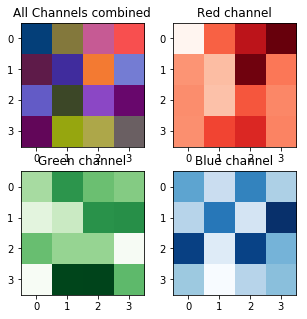

In [4]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

1D convolution

![title](img/discrete convolution.jpg)

In [5]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [6]:
b = np.array([-1, 1], dtype='float32')

In [7]:
c = np.convolve(a, b)

In [8]:
a

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.], dtype=float32)

In [9]:
a.shape

(15,)

In [10]:
b

array([-1.,  1.], dtype=float32)

In [11]:
b.shape

(2,)

In [12]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

In [13]:
c.shape

(16,)

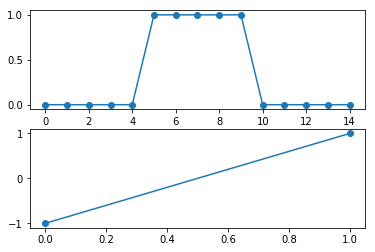

In [14]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(b, 'o-')

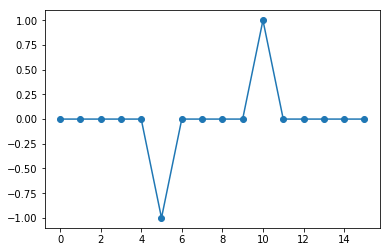

In [15]:
plt.plot(c, 'o-')

2D convolution

0.55 is the degree of matching with convolution filter
![title](img/2d convolution.jpg)

Image filters with convolutions

In [16]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [17]:
img = misc.ascent()

In [18]:
img.shape

(512, 512)

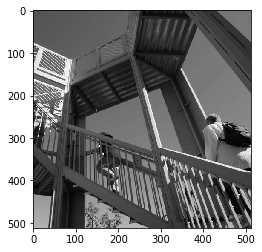

In [19]:
plt.imshow(img, cmap='gray')

In [20]:
#here we input kernel, but in cnn, these weights ll be found by network.
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

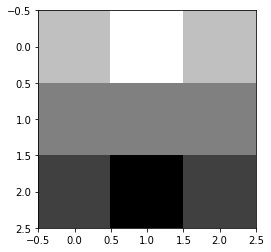

In [21]:
plt.imshow(h_kernel, cmap='gray')

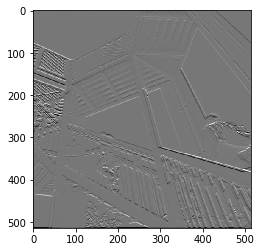

In [22]:
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray')
#some horizontal parts of img is highlighted, vertical is suppressed

Convolutional neural networks

input: 4 order tensor 
(N,H,W,C)
- N- no.of img
- H- height
- W- width
- C- no.of color channels

conv: 4 order tensor 
(Hf, Wf, Ci,Co)
- Hf- height of filter patch
- Wf- width of filter patch
- Ci- no.of color channels in input
- Co- no.of color channels in output filters

![title](img/convolution layer.jpg)

Convolution strides
![title](img/conv strides.jpg)

Convolution padding : preserves the img size
![title](img/conv padding.jpg)



In [23]:
from keras.layers import Conv2D

Using TensorFlow backend.


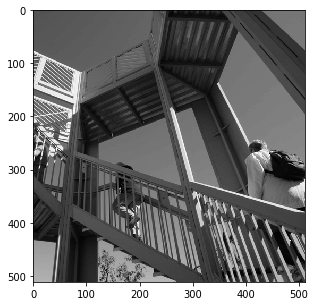

In [24]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [25]:
img

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ..., 
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [26]:
img.shape

(512, 512)

In [27]:
#reshaping to 4 order tensor
img_tensor = img.reshape((1, 512, 512, 1))

In [28]:
img_tensor

array([[[[ 83],
         [ 83],
         [ 83],
         ..., 
         [117],
         [117],
         [117]],

        [[ 82],
         [ 82],
         [ 83],
         ..., 
         [117],
         [117],
         [117]],

        [[ 80],
         [ 81],
         [ 83],
         ..., 
         [117],
         [117],
         [117]],

        ..., 
        [[178],
         [178],
         [178],
         ..., 
         [ 57],
         [ 59],
         [ 57]],

        [[178],
         [178],
         [178],
         ..., 
         [ 56],
         [ 57],
         [ 57]],

        [[178],
         [178],
         [178],
         ..., 
         [ 57],
         [ 57],
         [ 58]]]])

In [29]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
# 1 convolutional layer, (3,3) kernel
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

NameError: name 'Sequential' is not defined

In [ ]:
img_pred_tensor = model.predict(img_tensor)

In [ ]:
img_pred_tensor.shape

In [ ]:
img_pred = img_pred_tensor[0, :, :, 0]

In [ ]:
img_pred.shape

In [ ]:
plt.imshow(img_pred, cmap='gray')

In [ ]:
weights = model.get_weights()

In [ ]:
weights[0].shape

In [ ]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [ ]:
#new filter with all ones
weights[0] = np.ones(weights[0].shape)

In [ ]:
model.set_weights(weights)

In [ ]:
img_pred_tensor = model.predict(img_tensor)

In [ ]:
img_pred = img_pred_tensor[0,:,:,0]

In [ ]:
img_pred.shape

In [ ]:
plt.imshow(img_pred,cmap='gray')

In [ ]:
# img ll be padded with 0, so we wont loose the px on border
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

In [ ]:
img_pred = img_pred_tensor[0,:,:,0]
img_pred.shape

In [ ]:
plt.imshow(img_pred,cmap='gray')

Pooling layers

max pool:
maximum value is alone kept no overlapping so that img size is reduced, preserving info about good matches
![title](img/max pool.jpg)

In [ ]:
from keras.layers import MaxPool2D, AvgPool2D

In [ ]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [ ]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

In [ ]:
plt.imshow(img_pred, cmap='gray')

In [ ]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [ ]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

Final architecture: cnn
![title](img/cnn.jpg)

In [ ]:
X_train.shape

In [ ]:
#reshape 4 order tensor
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train.shape

In [ ]:
from keras.layers import Flatten, Activation

In [ ]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

In [ ]:
model.evaluate(X_test, y_test_cat)